In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
import pandas as pd

# Replace 'path/to/Only_MDA.xlsx' with the actual path to your file
file_path = '/Users/yuxuanzhang/Desktop/Only_MDA.xlsx'

# Read the Excel file into a pandas DataFrame
qtr1_n_4_2018 = pd.read_excel(file_path)

# Now you can work with the DataFrame 'df'
# For example, you can print the first few rows using df.head():
print(qtr1_n_4_2018.head())

        Date document_type ticker               title  cik_str  num_words  \
0 2018-01-02          10-Q   SURG     SurgePays, Inc.  1392694       1337   
1 2018-01-02          10-Q    NaN                 NaN  1606364          1   
2 2018-01-02          10-Q   CLOW      Cloudweb, Inc.  1619227       2730   
3 2018-01-02          10-K   EXDW  Exceed World, Inc.  1634293        717   
4 2018-01-02          10-K   VERU           VERU INC.   863894       5644   

                                               Value  
0  Management's Discussion and Analysis of Financ...  
1                                       Management's  
2  Management's DISCUSSION AND ANALYSIS OF FINANC...  
3  Management's Discussion. and Analysis of Finan...  
4  Management's Discussion and Analysis of Financ...  


In [91]:
# Replace 'path/to/Only_MDA.xlsx' with the actual path to your file
file_path = '/Users/yuxuanzhang/Desktop/output13.xlsx'

# Read the Excel file into a pandas DataFrame
qtr1_2022 = pd.read_excel(file_path)

# Now you can work with the DataFrame 'df'
# For example, you can print the first few rows using df.head():
print(qtr1_2022.head())

         Date document_type ticker                               title  \
0  2022-02-23          10-K    KAR                      OPENLANE, Inc.   
1  2022-02-25          10-K   EVTC                       EVERTEC, Inc.   
2  2022-02-25          10-K   AMSF                       AMERISAFE INC   
3  2022-02-08          10-Q   MRCY                 MERCURY SYSTEMS INC   
4  2022-02-10          10-Q   BCHG  Grayscale Bitcoin Cash Trust (BCH)   

   cik_str  num_words                                              Value  
0  1395942      12456  Management's Discussion and Analysis of Financ...  
1  1559865      26603  Management's Discussion and Analysis of Financ...  
2  1018979      21496  Management's Discussion and Analysis of Financ...  
3  1049521       6423  Management's DISCUSSION AND ANALYSIS OF FINANC...  
4  1732409          1                                       Management's  


In [92]:

# Concatenate the dataframes along the rows (axis=0) to combine them vertically
combined_df = pd.concat([qtr1_n_4_2018, qtr1_2022], axis=0, ignore_index=True)

# Save the combined dataframe to a new Excel file
combined_df.to_excel('combined_sheet.xlsx', index=False)

# Print the combined dataframe (optional)
print(combined_df.head(10))


                  Date document_type ticker                          title  \
0  2018-01-02 00:00:00          10-Q   SURG                SurgePays, Inc.   
1  2018-01-02 00:00:00          10-Q    NaN                            NaN   
2  2018-01-02 00:00:00          10-Q   CLOW                 Cloudweb, Inc.   
3  2018-01-02 00:00:00          10-K   EXDW             Exceed World, Inc.   
4  2018-01-02 00:00:00          10-K   VERU                      VERU INC.   
5  2018-01-03 00:00:00          10-Q   SRRE  SUNRISE REAL ESTATE GROUP INC   
6  2018-01-03 00:00:00          10-K    GGE               Green Giant Inc.   
7  2018-01-03 00:00:00          10-K    NaN                            NaN   
8  2018-01-03 00:00:00          10-K    NaN                            NaN   
9  2018-01-03 00:00:00          10-Q    NaN                            NaN   

   cik_str  num_words                                              Value  
0  1392694       1337  Management's Discussion and Analysis of Fin

In [93]:
len(combined_df)

12097

In [94]:
combined_df['num_words'].describe()

count     12097.000000
mean      10951.472183
std       13209.787015
min           1.000000
25%        2044.000000
50%        6474.000000
75%       14521.000000
max      130458.000000
Name: num_words, dtype: float64

In [70]:
combined_df['num_words'].min()

11

In [95]:
#512 as finbert model has the maximum token counts of 512

count_occurrences = combined_df[combined_df['num_words'] < 30].shape[0]
print(count_occurrences)

1882


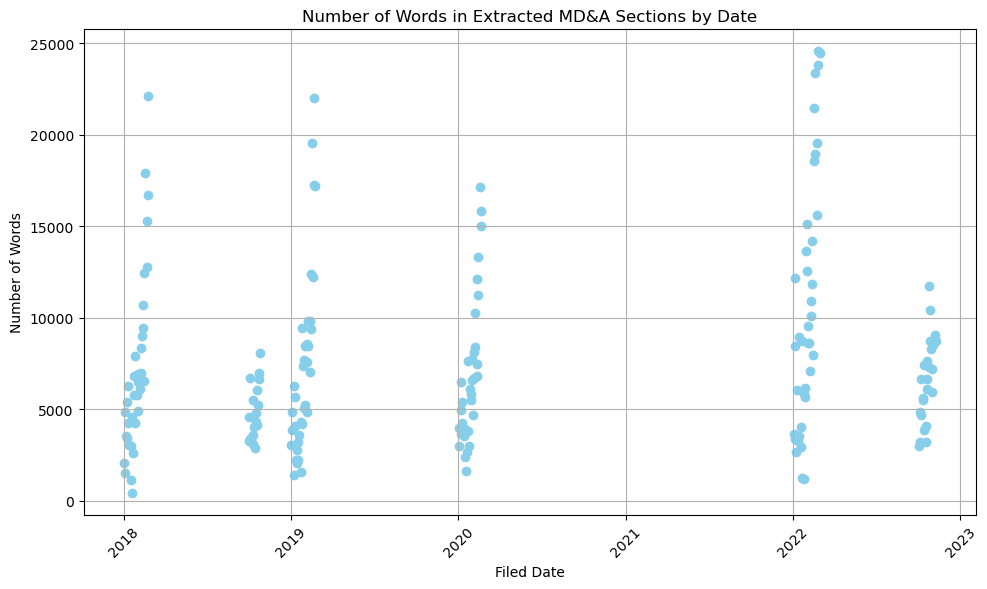

In [106]:
# Convert the 'Filed_At' column to a datetime data type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Group the data by date and calculate the average number of words for each date
words_by_date = combined_df.groupby('Date')['num_words'].mean().reset_index()

# Create a scatter plot of the data with dates on the x-axis
plt.figure(figsize=(10, 6))
plt.scatter(words_by_date['Date'], words_by_date['num_words'], color='skyblue', label='MD&A Section', marker='o')
plt.xlabel('Filed Date')
plt.ylabel('Number of Words')
plt.title('Number of Words in Extracted MD&A Sections by Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




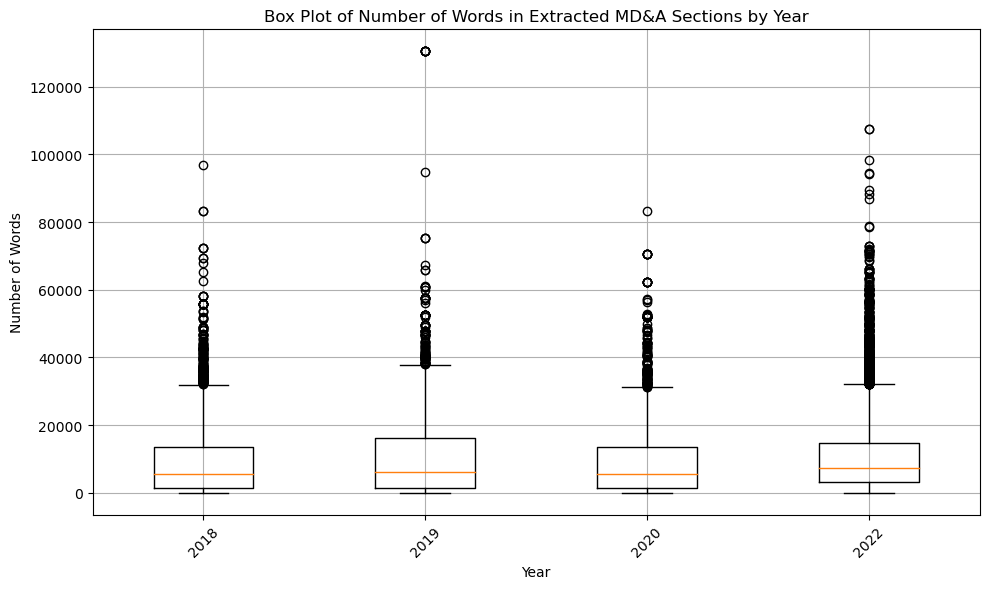

In [107]:
# Convert the 'Filed_At' column to a datetime data type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
combined_df['Year'] = combined_df['Date'].dt.year

# Create a box plot for each year
plt.figure(figsize=(10, 6))
plt.boxplot([group['num_words'] for year, group in combined_df.groupby('Year')],
            labels=[year for year, group in combined_df.groupby('Year')])
plt.xlabel('Year')
plt.ylabel('Number of Words')
plt.title('Box Plot of Number of Words in Extracted MD&A Sections by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
df_10k=combined_df[combined_df['document_type']=='10-K']
df_10q=combined_df[combined_df['document_type']=='10-Q']

In [98]:

print(len(df_10k))
print(len(df_10q))

4886
7211


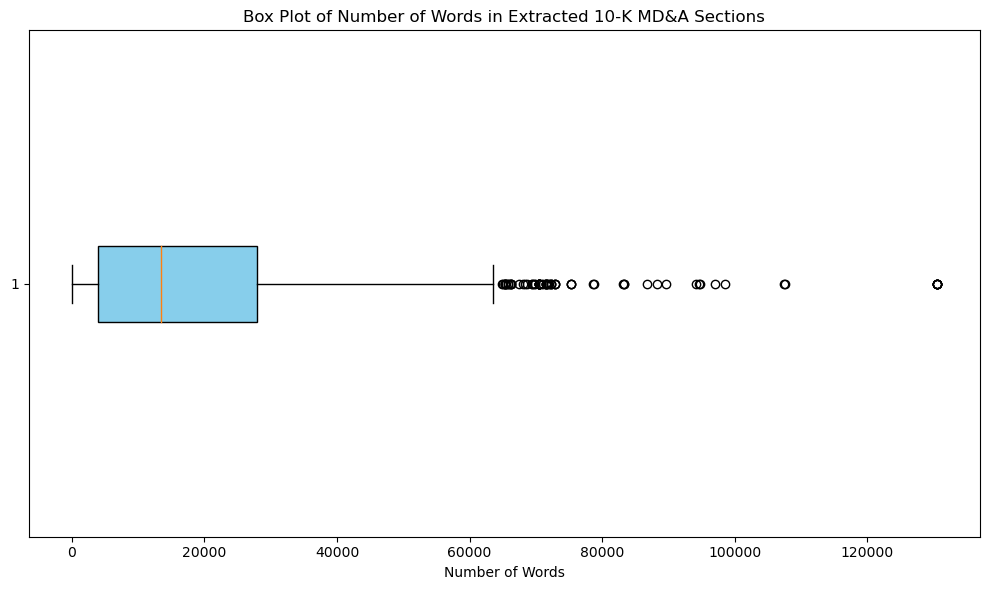

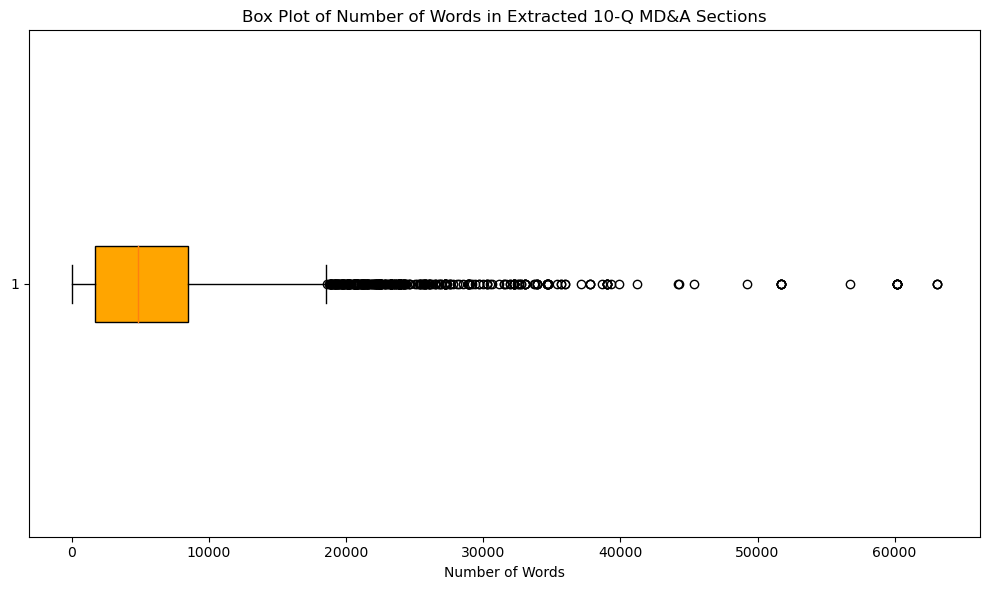

In [99]:

# Function to add labels for quantiles in box plots
# Plot the 10-K data as a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_10k['num_words'], vert=False, showfliers=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Number of Words')
plt.title('Box Plot of Number of Words in Extracted 10-K MD&A Sections for 20')
plt.tight_layout()
plt.show()

# Plot the 10-Q data as a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_10q['num_words'], vert=False, showfliers=True, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.xlabel('Number of Words')
plt.title('Box Plot of Number of Words in Extracted 10-Q MD&A Sections')
plt.tight_layout()
plt.show()


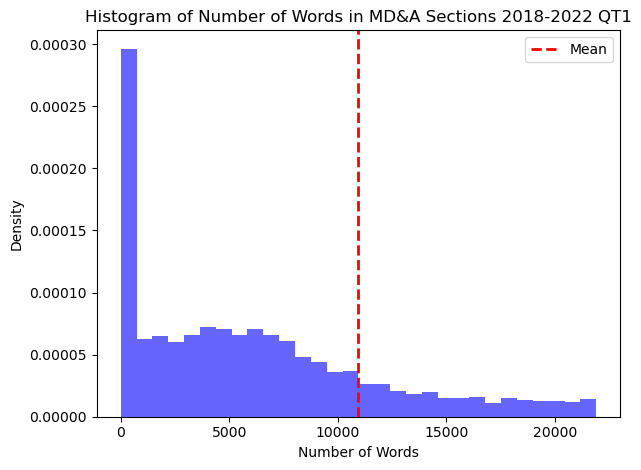

In [100]:
data = combined_df['num_words']

mean_value = np.mean(data)

# Calculate the range for the histogram to center around the mean
mean_range = 2 * (mean_value - np.min(data))  # Change the multiplier (2) as needed for the desired range

# Create a histogram of the data with adjusted bins and range
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', range=(mean_value - mean_range / 2, mean_value + mean_range / 2))

# Add a vertical line for the mean
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.title('Histogram of Number of Words in MD&A Sections 2018-2022 QT1')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()










ecide to use word count # 100 as a standard to filter the report that provide inefficient word count in extracted MDA part. reason being that: 1st, a pattern shows word count between 30-50, either there are solely repetition appearance of headings of managmenet discussion analysis. 2nd when it's around 70-100, there are some report that has one or two sentences of useful information but this is not common. Therefore based on this intuition and logic we decide to use 100 as a filtering point.

KeyboardInterrupt: 

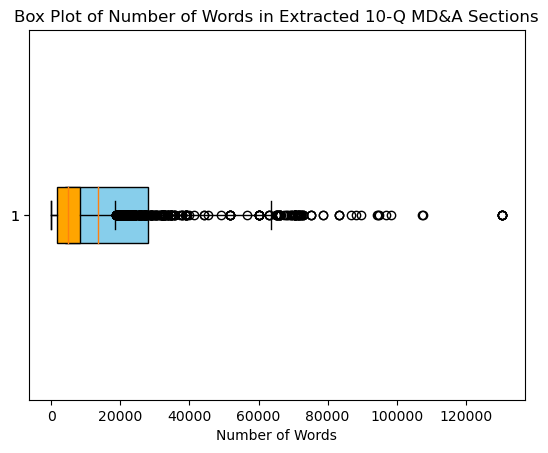

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl



# this section, please don't run mutiple time as the last code will overwrite the excel saved in local environment



def add_quantile_labels(bp, data_series, labels):
    for i, val in enumerate(labels):
        quantile_value = bp['medians'][i].get_ydata()[0]
        plt.annotate(val, (bp['boxes'][i].get_xdata()[0], quantile_value),
                     xytext=(10, 0), textcoords='offset points', color='black')

# Plot the 10-K data as a box plot
box_plot_10k = plt.boxplot(df_10k['num_words'], vert=False, showfliers=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Number of Words')
plt.title('Box Plot of Number of Words in Extracted 10-K MD&A Sections')

# Calculate 25th and 75th quantiles for 10-K filings
q25_10k, q75_10k = df_10k['num_words'].quantile([0.25, 0.75])

# Flag abnormal extractions for 10-K filings (word count < 100)
combined_df.loc[combined_df['document_type'] == '10-K', 'Abnormal_Extraction'] = combined_df.loc[combined_df['document_type'] == '10-K', 'num_words'].apply(lambda x: 'Abnormal' if x < 100 else 'Normal')

# Plot the 10-Q data as a box plot
box_plot_10q = plt.boxplot(df_10q['num_words'], vert=False, showfliers=True, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.xlabel('Number of Words')
plt.title('Box Plot of Number of Words in Extracted 10-Q MD&A Sections')

# Calculate 25th and 75th quantiles for 10-Q filings
q25_10q, q75_10q = df_10q['num_words'].quantile([0.25, 0.75])

# Flag abnormal extractions for 10-Q filings (word count < 100)
combined_df.loc[combined_df['document_type'] == '10-Q', 'Abnormal_Extraction'] = combined_df.loc[combined_df['document_type'] == '10-Q', 'num_words'].apply(lambda x: 'Abnormal' if x < 100 else 'Normal')

# Save the modified DataFrame to the original Excel file on your local desktop
file_path = '/Users/yuxuanzhang/Desktop/combined_df.xlsx'
combined_df.to_excel(file_path, index=False, engine='openpyxl')

# Open the Excel file with openpyxl and get the worksheet
workbook = openpyxl.load_workbook(file_path)
worksheet = workbook.active

# Get the column index of the 'Abnormal_Extraction' column
abnormal_col_idx = combined_df.columns.get_loc('Abnormal_Extraction') + 1

# Iterate through each row and set cell color based on 'Abnormal_Extraction' value
for row_idx, row in enumerate(worksheet.iter_rows(min_row=2, values_only=True), start=2):
    if row[abnormal_col_idx - 1] == 'Abnormal':
        cell = worksheet.cell(row=row_idx, column=abnormal_col_idx)
        cell.fill = openpyxl.styles.PatternFill(start_color='FFC0CB', end_color='FFC0CB', fill_type='solid')  # Light Red

# Save the modified Excel file
workbook.save(file_path)






In [33]:
abnormal=[combined_df[combined_df['Abnormal_Extraction']=='Abnormal']]
normal=[combined_df[combined_df['Abnormal_Extraction']=='Normal']]

In [105]:
abnormal_count = combined_df['Abnormal_Extraction'].value_counts()
print(abnormal_count)

Normal      10096
Abnormal     2001
Name: Abnormal_Extraction, dtype: int64
